# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser
Alunos: Gerson Daniel Santos Marques e Jos√© Raimundo Alves dos Santos J√∫nior
## Introdu√ß√£o

Filtros FIR (Finite Impulse Response) apesar de apresentar uma ordem elevada, s√£o amplamente utilizados devido √† sua estabilidade, precis√£o e fase linear. A ideia, √© usar um filtro o mais pr√≥ximo do ideal, causal e com dura√ß√£o finita. Para isso, usamos a t√©cnica do janelamento para truncar um filtro ideal e n√£o-causal, deslocando o mesmo para a direita a fim de torn√°-lo causal e de dura√ß√£o finita. Portanto, neste trabalho, projetamos um filtro FIR passa-baixa usando o m√©todo da janela de Kaiser, garantindo:

- Atenua√ß√£o na banda rejeitada ‚â• 50 dB
- Frequ√™ncia de corte: œâc = œÄ/2
- Regi√£o de transi√ß√£o: Œîœâ < 0,1œÄ

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/FiltroGeral.png?raw=1">

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transforma√ß√µes.

## Filtro FIR Passa-Baixa

O filtro ser√° projetado pelo m√©todo da janela, usando a janela de Kaiser, que permite controlar a transi√ß√£o e atenua√ß√£o com o par√¢metro Œ≤.

### C√°lculo do Par√¢metro Œ≤

O valor de Œ≤ depende da atenua√ß√£o desejada:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoBeta.png?raw=1" />

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Par√¢metros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # œâc = œÄ/2
largura_transicao = 0.1 * np.pi  # Œîœâ < 0,1œÄ

# C√°lculo do par√¢metro Œ≤
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

print(f"Par√¢metro Œ≤ calculado: {beta}")

Par√¢metro Œ≤ calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de Œ≤ calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o c√≥digo para projetar o filtro e plotar sua resposta em frequ√™ncia.

O valor de M ser√°:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoM.png?raw=1" />

In [ ]:
# C√°lculo da ordem M do filtro (num_taps)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))
print(f"Par√¢metro M calculado: {M}")

Par√¢metro M calculado: 59


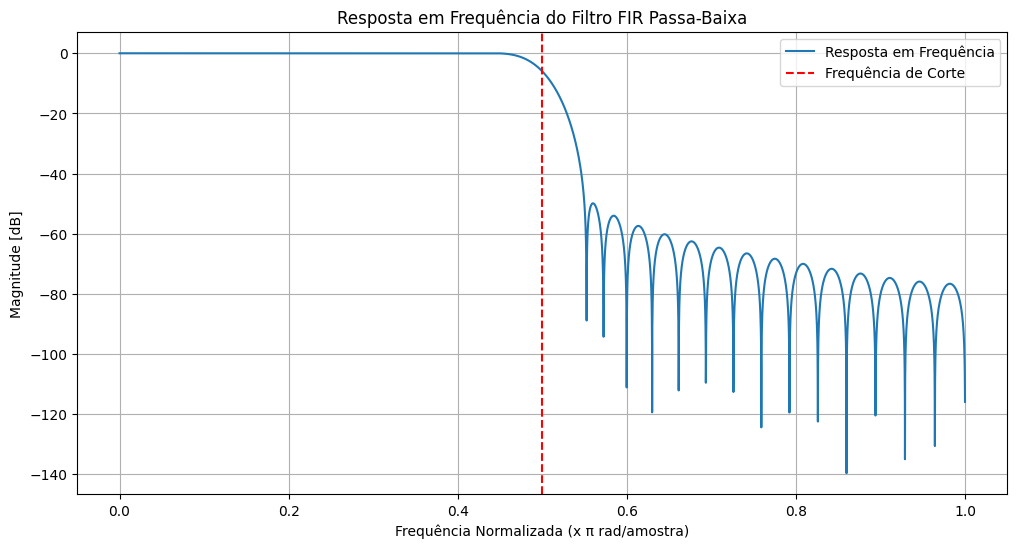

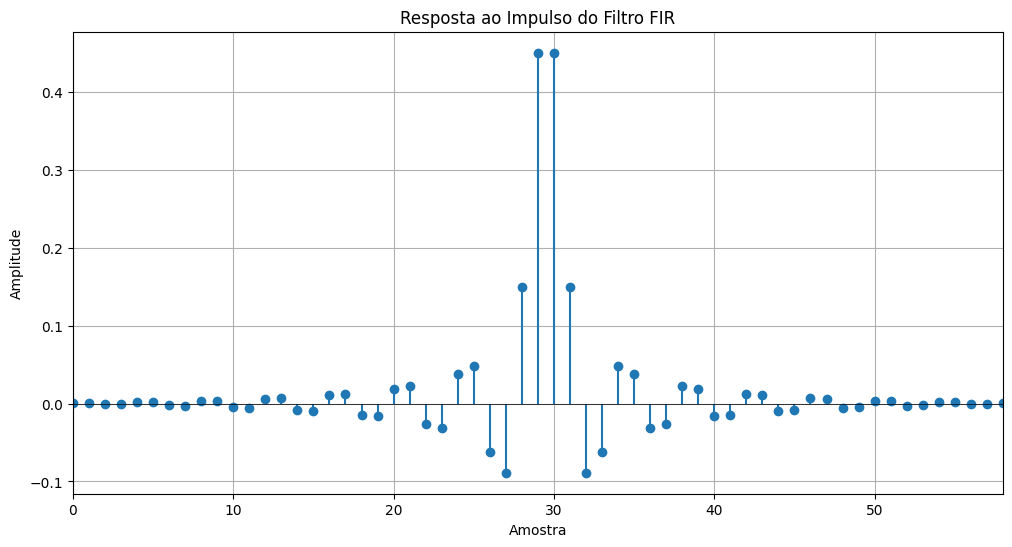

In [ ]:
# Projeta o filtro FIR
h_fir = signal.firwin(M + 1, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# Resposta em frequ√™ncia do filtro
frequencias, resposta = signal.freqz(h_fir, worN=8000)

# Converte para se√ß√µes de segunda ordem (SOS)
sos_cascata_original = signal.tf2sos(h_fir, 1)

# Calcular a resposta em frequ√™ncia para a precis√£o infinita (sem quantiza√ß√£o)
frequencias_q_sos_inf, resposta_cascata_inf = signal.sosfreqz(sos_cascata_original, worN=8000)

# Plot da resposta em frequ√™ncia
plt.figure(figsize=(12, 6))
plt.plot(frequencias / np.pi, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequ√™ncia')

# Configura√ß√£o do gr√°fico
plt.title('Resposta em Frequ√™ncia do Filtro FIR Passa-Baixa')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='red', linestyle='--', label='Frequ√™ncia de Corte')
plt.legend()
plt.show()

# Plotando resposta ao impulso do filtro
plt.figure(figsize=(12, 6))
plt.stem(range(M+1), h_fir[:M+1], basefmt=" ")
plt.title('Resposta ao Impulso do Filtro FIR')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.xlim(0, M - 1)
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)  # Linha central
plt.grid(True)  # Ativar grade para melhor visualiza√ß√£o
plt.show()

Como esperado, o filtro oscilante na faixa de rejei√ß√£o e a frequencia de corte em œÄ/2 e a nossa resposta ao impulso com moldes de uma sinc. Podemos tamb√©m obter o diagrama de polos e zeros do nosso filtro:

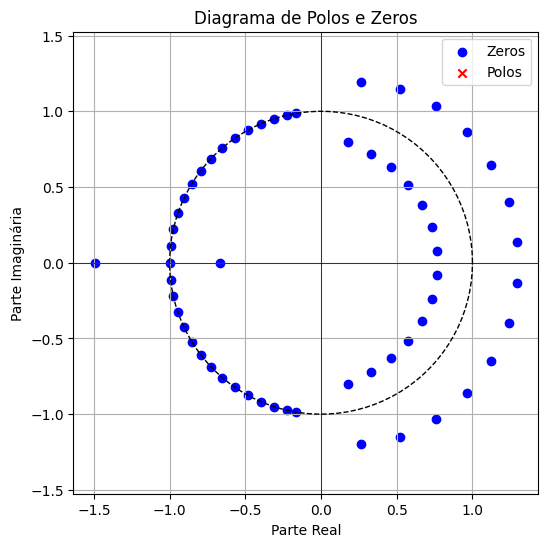

In [ ]:
z, p, k = signal.tf2zpk(h_fir, [1])

# Criar o diagrama de polos e zeros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Polos')

# Desenhar o c√≠rculo unit√°rio
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

# Configura√ß√£o do gr√°fico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imagin√°ria')
plt.title('Diagrama de Polos e Zeros')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Para manter a propor√ß√£o circular
plt.show()

Por se tratar de um filtro FIR, apenas temos zeros ( o denominador √© 1). Observa-se que estamos diantes de um filtro FIR do tipo II, em que o Œ± n√£o √© uma amostra. √â poss√≠vel inferir, tamb√©m, de que se trata de um filtro passa-baixas, devido a anula√ß√£o das altas frequ√™ncias e permi√ß√£o da passagem de baixas frequ√™ncias.

### Implementa√ß√£o nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. A *forma em cascata* decomp√µe o filtro em se√ß√µes de segunda ordem (SOS). Vamos usar a fun√ß√£o tf2sos da SciPy para converter a forma direta em cascata. Vamos quantizar os coeficientes para estudar a sensibilidade √† quantiza√ß√£o.



In [ ]:
from scipy.signal import tf2sos

# Forma direta
print("Coeficientes da forma direta (precis√£o infinita):")
print(h_fir )

# Forma em cascata
sos = tf2sos(h_fir , 1)  # Converte para se√ß√µes de segunda ordem (SOS)
print("\nCoeficientes da forma em cascata (precis√£o infinita):")
print(sos)



Coeficientes da forma direta (precis√£o infinita):
[ 4.23762209e-04  6.02198652e-04 -8.16057159e-04 -1.06930606e-03
  1.36620371e-03  1.71134743e-03 -2.10974070e-03 -2.56688439e-03
  3.08890004e-03  3.68269628e-03 -4.35619355e-03 -5.11862922e-03
  5.98097465e-03  6.95651129e-03 -8.06163671e-03 -9.31701094e-03
  1.07492180e-02  1.23932302e-02 -1.42961620e-02 -1.65231714e-02
  1.91670887e-02  2.23648412e-02 -2.63270122e-02 -3.13946767e-02
  3.81582270e-02  4.77346115e-02 -6.25198094e-02 -8.87471950e-02
  1.49279269e-01  4.49899875e-01  4.49899875e-01  1.49279269e-01
 -8.87471950e-02 -6.25198094e-02  4.77346115e-02  3.81582270e-02
 -3.13946767e-02 -2.63270122e-02  2.23648412e-02  1.91670887e-02
 -1.65231714e-02 -1.42961620e-02  1.23932302e-02  1.07492180e-02
 -9.31701094e-03 -8.06163671e-03  6.95651129e-03  5.98097465e-03
 -5.11862922e-03 -4.35619355e-03  3.68269628e-03  3.08890004e-03
 -2.56688439e-03 -2.10974070e-03  1.71134743e-03  1.36620371e-03
 -1.06930606e-03 -8.16057159e-04  6.021

### An√°lise da Sensibilidade √† Quantiza√ß√£o
Vamos comparar a resposta em frequ√™ncia do filtro com precis√£o infinita e com precis√£o finita

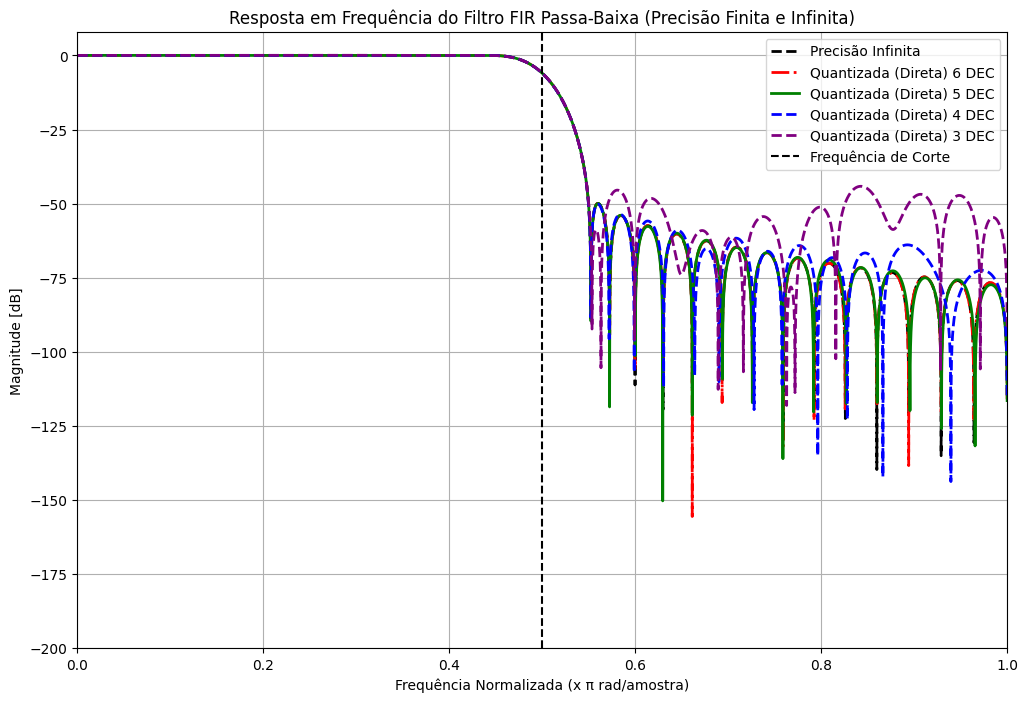

In [ ]:
# Calcular a resposta em frequ√™ncia para a precis√£o infinita (sem quantiza√ß√£o)
frequencias_q_inf, resposta_direta_inf = signal.freqz(h_fir, worN=8000)

# Quantiza√ß√£o dos coeficientes (Forma Direta)
h_fir_quantizados_3dec = np.round(h_fir, decimals=3)
h_fir_quantizados_4dec = np.round(h_fir, decimals=4)
h_fir_quantizados_5dec = np.round(h_fir, decimals=5)
h_fir_quantizados_6dec = np.round(h_fir, decimals=6)


# Resposta em frequ√™ncia para a forma direta quantizada

frequencias_q_3dec, resposta_direta_quantizada_3dec = signal.freqz(h_fir_quantizados_3dec, worN=8000)
frequencias_q_4dec, resposta_direta_quantizada_4dec = signal.freqz(h_fir_quantizados_4dec, worN=8000)
frequencias_q_5dec, resposta_direta_quantizada_5dec = signal.freqz(h_fir_quantizados_5dec, worN=8000)
frequencias_q_6dec, resposta_direta_quantizada_6dec = signal.freqz(h_fir_quantizados_6dec, worN=8000)


# **Plot das respostas em frequ√™ncia (Respostas Diretas - Precis√£o Finita + Precis√£o Infinita)**
plt.figure(figsize=(12, 8))

plt.plot(
    frequencias_q_inf / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_direta_inf), 1e-10)),
    label='Precis√£o Infinita', color='black', linestyle='--', linewidth=2
)
plt.plot(
    frequencias_q_6dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_direta_quantizada_6dec), 1e-10)),
    label='Quantizada (Direta) 6 DEC', color='red', linestyle='-.', linewidth=2
)
plt.plot(
    frequencias_q_5dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_direta_quantizada_5dec), 1e-10)),
    label='Quantizada (Direta) 5 DEC', color='green', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_4dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_direta_quantizada_4dec), 1e-10)),
    label='Quantizada (Direta) 4 DEC', color='blue', linestyle='--', linewidth=2
)
plt.plot(
    frequencias_q_3dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_direta_quantizada_3dec), 1e-10)),
    label='Quantizada (Direta) 3 DEC', color='purple', linestyle='--', linewidth=2
)

plt.title('Resposta em Frequ√™ncia do Filtro FIR Passa-Baixa (Precis√£o Finita e Infinita)')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='black', linestyle='--', label='Frequ√™ncia de Corte')
plt.legend()
plt.xlim(left=0.0, right=1.0)  # Ajuste do eixo X
plt.ylim(bottom=-200)  # Ajuste do eixo Y
plt.show()


Nota-se, que, para a quantiza√ß√£o de 3 casas decimais, j√° podemos ver uma viola√ß√£o na atenua√ß√£o desejada, que por sua vez, precisa ser maior que 50 dB. A faixa de rejei√ß√£o est√° atenuando algumas frequencias acima de 50 dB. Tornando a forma direta mais sens√≠vel a quantiza√ß√£o.

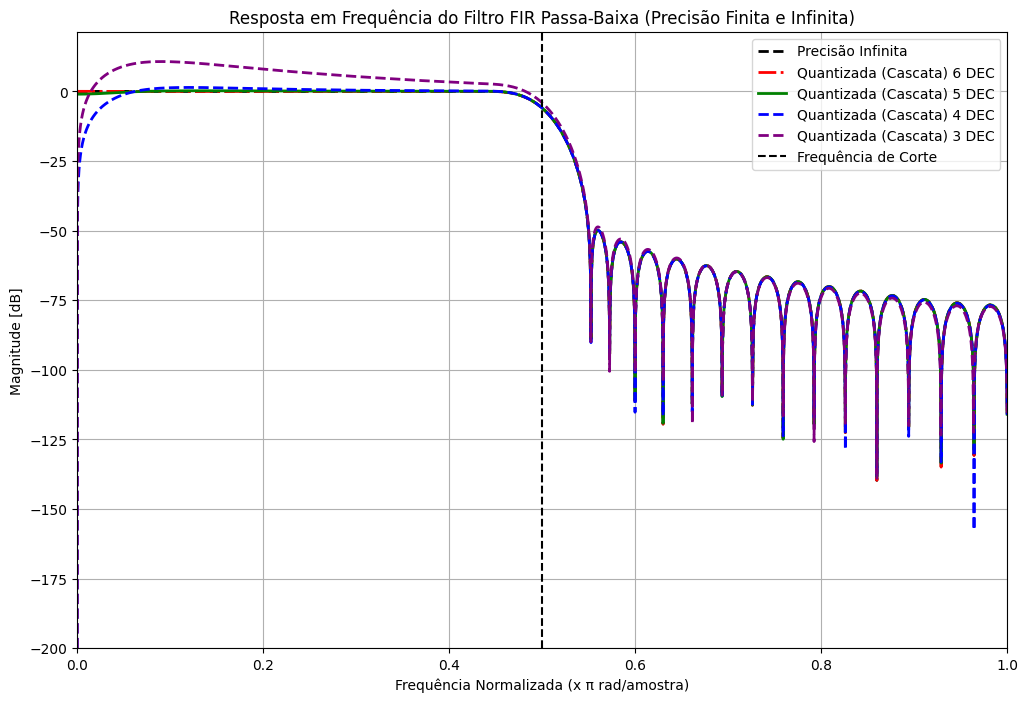

In [ ]:
# Calcular a resposta em frequ√™ncia para a precis√£o infinita (sem quantiza√ß√£o) na forma cascata
frequencias_q_sos_inf, resposta_cascata_inf = signal.sosfreqz(sos, worN=8000)

# Quantiza√ß√£o dos coeficientes para diferentes n√≠veis de precis√£o
sos_quantizado_6dec = np.round(sos_cascata_original, decimals=6)
sos_quantizado_5dec = np.round(sos_cascata_original, decimals=5)
sos_quantizado_4dec = np.round(sos_cascata_original, decimals=4)
sos_quantizado_3dec = np.round(sos_cascata_original, decimals=3)

# Calcular a resposta em frequ√™ncia para os filtros quantizados
frequencias_q_sos_6dec, resposta_cascata_quantizada_6dec = signal.sosfreqz(sos_quantizado_6dec, worN=8000)
frequencias_q_sos_5dec, resposta_cascata_quantizada_5dec = signal.sosfreqz(sos_quantizado_5dec, worN=8000)
frequencias_q_sos_4dec, resposta_cascata_quantizada_4dec = signal.sosfreqz(sos_quantizado_4dec, worN=8000)
frequencias_q_sos_3dec, resposta_cascata_quantizada_3dec = signal.sosfreqz(sos_quantizado_3dec, worN=8000)


# **Plot das respostas em frequ√™ncia (Respostas em Cascata - Precis√£o Finita + Precis√£o Infinita)**
plt.figure(figsize=(12, 8))

plt.plot(
    frequencias_q_sos_inf / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_cascata_inf), 1e-10)),
    label='Precis√£o Infinita', color='black', linestyle='--', linewidth=2
)
plt.plot(
    frequencias_q_sos_6dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_cascata_quantizada_6dec), 1e-10)),
    label='Quantizada (Cascata) 6 DEC', color='red', linestyle='-.', linewidth=2
)
plt.plot(
    frequencias_q_sos_5dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_cascata_quantizada_5dec), 1e-10)),
    label='Quantizada (Cascata) 5 DEC', color='green', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_sos_4dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_cascata_quantizada_4dec), 1e-10)),
    label='Quantizada (Cascata) 4 DEC', color='blue', linestyle='--', linewidth=2
)
plt.plot(
    frequencias_q_sos_3dec / np.pi, 20 * np.log10(np.maximum(np.abs(resposta_cascata_quantizada_3dec), 1e-10)),
    label='Quantizada (Cascata) 3 DEC', color='purple', linestyle='--', linewidth=2
)

plt.title('Resposta em Frequ√™ncia do Filtro FIR Passa-Baixa (Precis√£o Finita e Infinita)')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='black', linestyle='--', label='Frequ√™ncia de Corte')
plt.legend()
plt.xlim(left=0.0, right=1.0)  # Garante que a frequ√™ncia normalizada comece exatamente em 0.0
plt.ylim(bottom=-200)  # Ajuste do eixo Y para melhor visualiza√ß√£o
plt.show()


Com base nos gr√°ficos analisados, podemos concluir que a forma direta de implementa√ß√£o de filtros FIR √© significativamente mais sens√≠vel √† quantiza√ß√£o dos coeficientes, ou seja, √† redu√ß√£o do n√∫mero de casas decimais. Isso se deve ao fato de que pequenas altera√ß√µes nos coeficientes afetam diretamente a resposta em frequ√™ncia do filtro, resultando em mudan√ßas percept√≠veis na magnitude. Por outro lado, a forma em cascata demonstrou maior robustez √† quantiza√ß√£o, mantendo uma resposta em frequ√™ncia mais est√°vel mesmo com a redu√ß√£o do n√∫mero de casas decimais. Essa diferen√ßa ocorre porque a estrutura em cascata divide o filtro em se√ß√µes de segunda ordem, limitando a propaga√ß√£o de erros e tornando-a mais adequada para implementa√ß√µes em sistemas com precis√£o finita. Portanto, a forma em cascata √© prefer√≠vel em aplica√ß√µes pr√°ticas onde a quantiza√ß√£o dos coeficientes √© inevit√°vel.



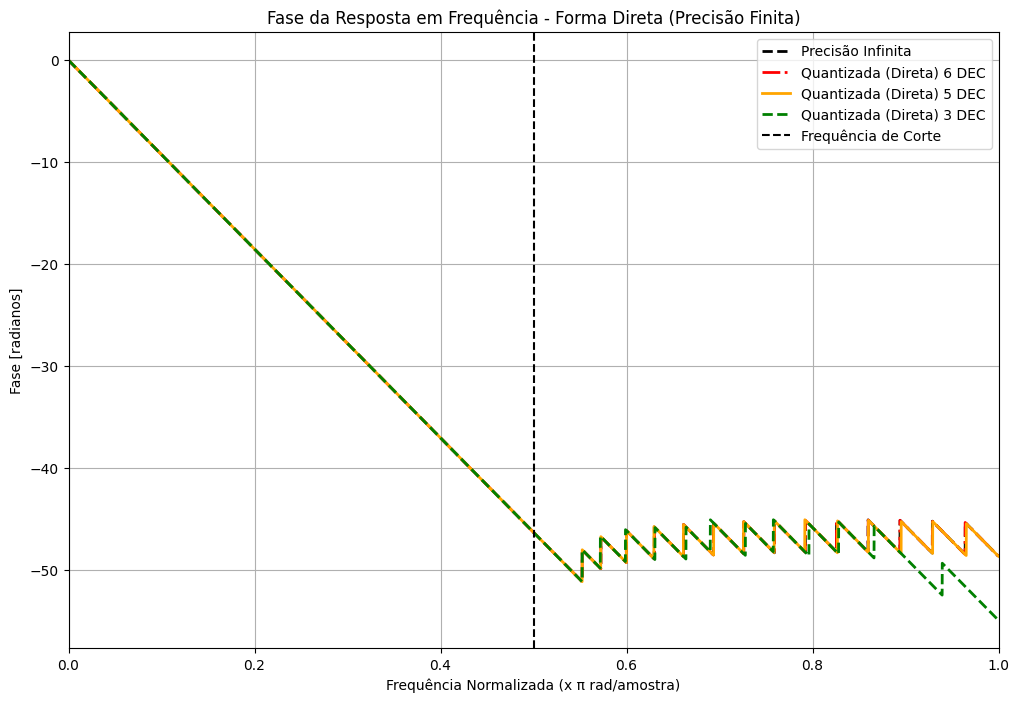

In [ ]:
# Calcular a resposta em frequ√™ncia para a precis√£o infinita (sem quantiza√ß√£o)
frequencias_q_inf, resposta_direta_inf = signal.freqz(h_fir, worN=8000)


# Quantiza√ß√£o dos coeficientes (Forma Direta)
h_fir_quantizados_3dec = np.round(h_fir, decimals=3)
h_fir_quantizados_5dec = np.round(h_fir, decimals=5)
h_fir_quantizados_6dec = np.round(h_fir, decimals=6)


# Resposta em frequ√™ncia para a forma direta quantizada
frequencias_q_6dec, resposta_direta_quantizada_6dec = signal.freqz(h_fir_quantizados_6dec, worN=8000)
frequencias_q_5dec, resposta_direta_quantizada_5dec = signal.freqz(h_fir_quantizados_5dec, worN=8000)
frequencias_q_3dec, resposta_direta_quantizada_3dec = signal.freqz(h_fir_quantizados_3dec, worN=8000)



# **Plot da fase da resposta em frequ√™ncia (Forma Direta - Precis√£o Finita)**
plt.figure(figsize=(12, 8))

plt.plot(
    frequencias_q_inf / np.pi, np.unwrap(np.angle(resposta_direta_inf)),
    label='Precis√£o Infinita', color='black', linestyle='--', linewidth=2
)

plt.plot(
    frequencias_q_6dec / np.pi, np.unwrap(np.angle(resposta_direta_quantizada_6dec)),
    label='Quantizada (Direta) 6 DEC', color='red', linestyle='-.', linewidth=2
)
plt.plot(
    frequencias_q_5dec / np.pi, np.unwrap(np.angle(resposta_direta_quantizada_5dec)),
    label='Quantizada (Direta) 5 DEC', color='orange', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_4dec / np.pi, np.unwrap(np.angle(resposta_direta_quantizada_4dec)),
    label='Quantizada (Direta) 3 DEC', color='green', linestyle='--', linewidth=2
)


plt.title('Fase da Resposta em Frequ√™ncia - Forma Direta (Precis√£o Finita)')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='black', linestyle='--', label='Frequ√™ncia de Corte')
plt.legend()
plt.xlim(left=0.0, right=1.0)  # Ajuste do eixo X
plt.show()


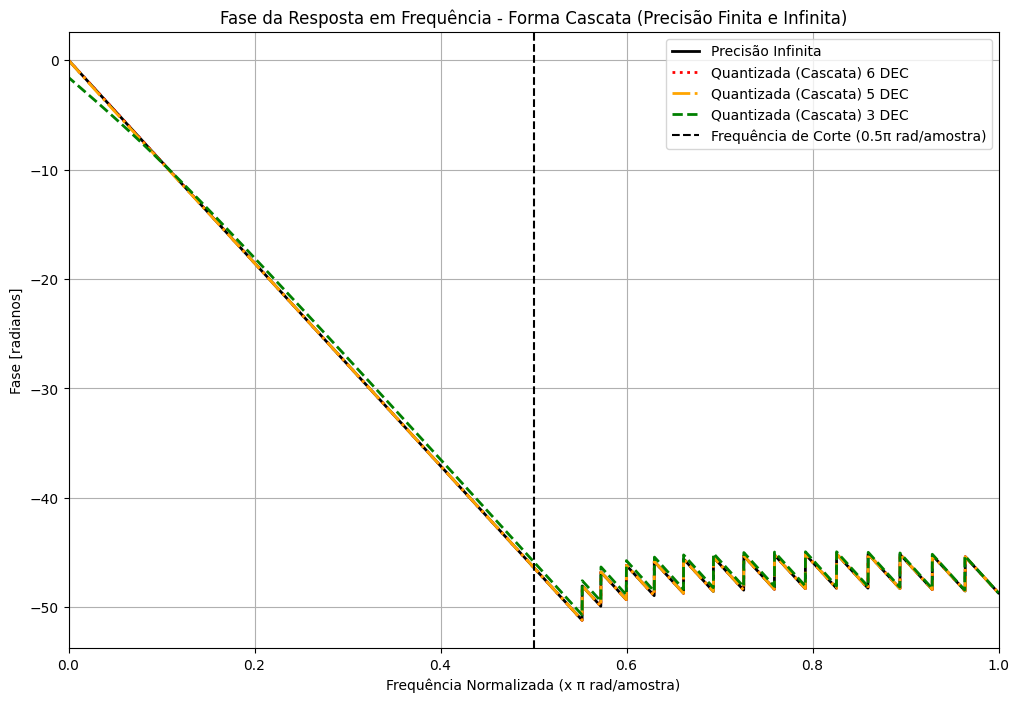

In [ ]:
# Quantiza√ß√£o dos coeficientes para diferentes n√≠veis de precis√£o
sos_quantizado_6dec = np.round(sos_cascata_original, decimals=6)
sos_quantizado_5dec = np.round(sos_cascata_original, decimals=5)
sos_quantizado_3dec = np.round(sos_cascata_original, decimals=3)

# Calcular a resposta em frequ√™ncia para os filtros quantizados
frequencias_q_sos_6dec, resposta_cascata_quantizada_6dec = signal.sosfreqz(sos_quantizado_6dec, worN=8000)
frequencias_q_sos_5dec, resposta_cascata_quantizada_5dec = signal.sosfreqz(sos_quantizado_5dec, worN=8000)
frequencias_q_sos_3dec, resposta_cascata_quantizada_3dec = signal.sosfreqz(sos_quantizado_3dec, worN=8000)


# Calcular a resposta em frequ√™ncia para a precis√£o infinita (sem quantiza√ß√£o) - Forma Cascata
frequencias_q_sos_inf, resposta_cascata_inf = signal.sosfreqz(sos_cascata_original, worN=8000)

# **Plot da fase da resposta em frequ√™ncia (Forma Cascata - Precis√£o Finita + Precis√£o Infinita)**
plt.figure(figsize=(12, 8))

plt.plot(
    frequencias_q_sos_inf / np.pi, np.unwrap(np.angle(resposta_cascata_inf)),
    label='Precis√£o Infinita', color='black', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_sos_6dec / np.pi, np.unwrap(np.angle(resposta_cascata_quantizada_6dec)),
    label='Quantizada (Cascata) 6 DEC', color='red', linestyle=':', linewidth=2
)
plt.plot(
    frequencias_q_sos_5dec / np.pi, np.unwrap(np.angle(resposta_cascata_quantizada_5dec)),
    label='Quantizada (Cascata) 5 DEC', color='orange', linestyle='-.', linewidth=2
)
plt.plot(
    frequencias_q_sos_3dec / np.pi, np.unwrap(np.angle(resposta_cascata_quantizada_3dec)),
    label='Quantizada (Cascata) 3 DEC', color='green', linestyle='--', linewidth=2
)

plt.title('Fase da Resposta em Frequ√™ncia - Forma Cascata (Precis√£o Finita e Infinita)')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.axvline(0.5, color='black', linestyle='--', label='Frequ√™ncia de Corte (0.5œÄ rad/amostra)')
plt.legend()
plt.xlim(left=0.0, right=1.0)  # Ajuste do eixo X
plt.show()


### Transforma√ß√µes em frequ√™ncia


A transforma√ß√£o em frequ√™ncia de um filtro √© uma t√©cnica para modificar a resposta em frequ√™ncia, permitindo que ele seja convertido de umk tipo para outro, como de para passa-alta, passa-faixa ou rejeita-faixa.

<ipython-input-14-e4660853e000>:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_transf / np.pi, 20 * np.log10(magnitude_resposta), label=nome, linewidth=2)  # Em dB


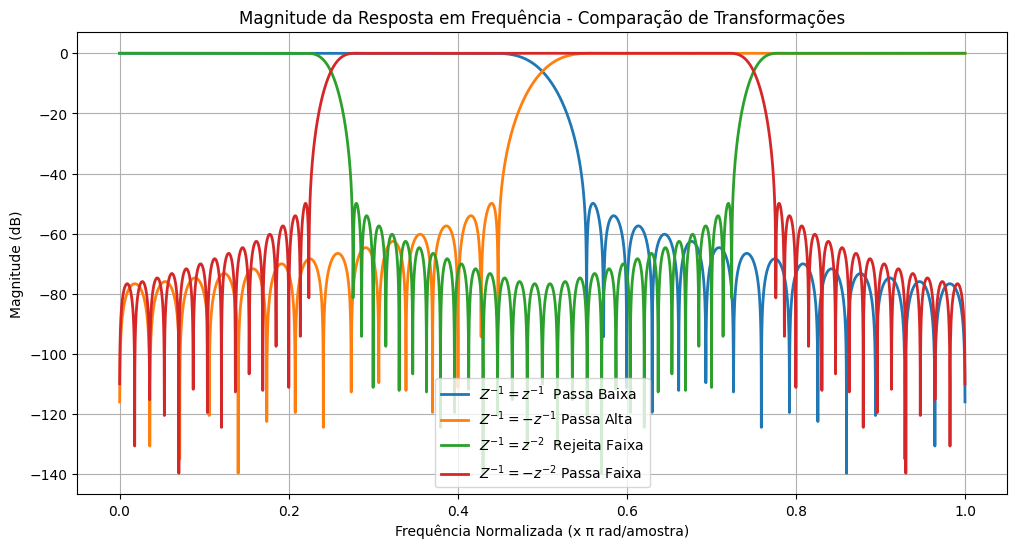

In [ ]:
# Fun√ß√£o para aplicar transforma√ß√µes em frequ√™ncia
def transformar_filtro(h_fir , transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir  * (-1) ** np.arange(len(h_fir ))
    #Inverte todos coeficientes
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir ) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    #Insere zeros entre os coeficientes do filtro
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir ) - 1)
        novos_h_fir[::2] = h_fir  * (-1) ** np.arange(len(h_fir ))
        return novos_h_fir
    # Insere zeros e inverte

# Aplicar as transforma√ß√µes no filtro
transformacoes = [
    (r'$Z^{-1} = z^{-1}$  Passa Baixa', h_fir),
    (r'$Z^{-1} = -z^{-1}$ Passa Alta', transformar_filtro(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$  Rejeita Faixa', transformar_filtro(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$ Passa Faixa', transformar_filtro(h_fir, 3))
]

# Criar o gr√°fico com todas as magnitudes
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    magnitude_resposta = np.abs(resposta_transformada)  # Obter a magnitude
    plt.plot(w_transf / np.pi, 20 * np.log10(magnitude_resposta), label=nome, linewidth=2)  # Em dB

# Configura√ß√£o do gr√°fico
plt.title('Magnitude da Resposta em Frequ√™ncia - Compara√ß√£o de Transforma√ß√µes')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()

#**Transforma√ß√µes B√°sicas**

###**Filtro Passa-Baixa**

Os polos e zeros do filtro passa-baixa s√£o mapeados diretamente para o plano
Z sem altera√ß√£o.


---

###**Transforma√ß√£o $-Z^{-1}$ : Filtro Passa Alta**

Essa transforma√ß√£o reflete os polos e zeros em rela√ß√£o √† origem do plano Z.

Os zeros est√£o refletidos em rela√ß√£o ao eixo imagin√°rio.

O filtro passa-alta permite a passagem de frequ√™ncias altas e atenua frequ√™ncias baixas.

H√° uma invers√£o de sinal, o que resulta em uma mudan√ßa de fase de 180¬∞.

Isso inverte a resposta em frequ√™ncia, transformando um filtro passa-baixa em passa-alta.

---

###**Transforma√ß√£o $Z^{-2}$ : Filtro Rejeita Faixa**

Essa transforma√ß√£o duplica a ordem do filtro, mapeando cada polo e zero para duas localiza√ß√µes no plano Z.

Novos zeros aparecem entre os zeros existentes, refletindo a interpola√ß√£o aplicada.

Isso cria uma resposta em frequ√™ncia mais complexa, com m√∫ltiplos zeros.

Os zeros aparecem em pares sim√©tricos ao longo do c√≠rculo unit√°rio.
O filtro rejeita-faixa atenua uma faixa espec√≠fica de frequ√™ncias.

---

###**Transforma√ß√£o $-Z^{-2}$ : Filtro Passa-Faixa**

H√° uma invers√£o de sinal, resultando em uma resposta em frequ√™ncia que permite a passagem de uma faixa espec√≠fica.

O filtro passa-faixa permite a passagem de uma faixa espec√≠fica de frequ√™ncias e atenua as frequ√™ncias fora dessa faixa.

Quando aplicamos $ Z^{-1} = -z^{-2} $, estamos modificando os coeficientes do filtro FIR original de duas maneiras:

1. **Interpola√ß√£o**:  
   - Inserimos **zeros entre os coeficientes originais**, dobrando o comprimento do filtro.

2. **Invers√£o Alternada**:  
   - Cada coeficiente original $h[n]$ recebe um **fator de altern√¢ncia** $(-1)^n $, ou seja, os coeficientes positivos se tornam negativos e vice-versa.

No dom√≠nio da frequ√™ncia, essa interpola√ß√£o dobra a periodicidade do espectro, criando novos zeros no dom√≠nio
Z (diagrama de polos e zeros).

### üßÆ **Express√£o Matem√°tica**

$h'[n] = h[n] \cdot (-1)^n$, com inser√ß√£o de zeros intermedi√°rios









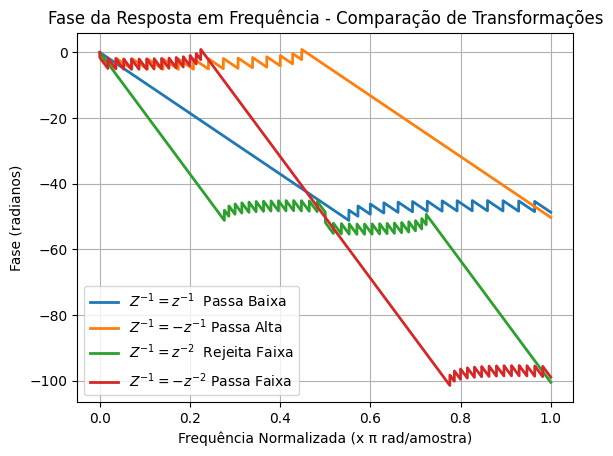

In [ ]:
# Plotando a fase das transforma√ß√µes em frequ√™ncia
for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    fase_resposta = np.unwrap(np.angle(resposta_transformada))  # Corrigir descontinuidades
    plt.plot(w_transf / np.pi, fase_resposta, label=nome, linewidth=2)

# Configura√ß√£o do gr√°fico
plt.title('Fase da Resposta em Frequ√™ncia - Compara√ß√£o de Transforma√ß√µes')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()
plt.show()

#**Comportamento da Fase**

---
####**Faixa de Passagem (Magnitude pr√≥xima de 0 dB):**


Na faixa de passagem, a fase do filtro passa-baixa diminui linearmente com o aumento da frequ√™ncia. Isso ocorre porque o filtro introduz um atraso de fase proporcional √† frequ√™ncia.

Dobrar a resposta em frequencia faz a fase decair mais rapido, isso ocorre devido a interpola√ß√£o.

---

####**Faixa de Transi√ß√£o (Magnitude caindo):**

Na faixa de transi√ß√£o, a fase continua a diminuir linearmente, mas a taxa de varia√ß√£o pode mudar ligeiramente devido √† mudan√ßa na magnitude.

Ainda assim, o comportamento da fase permanece pr√≥ximo do linear, pois o filtro ainda est√° processando o sinal de maneira suave.

---

####**Fase "Dente de Serra":**
Nessa situa√ß√£o, pequenas varia√ß√µes na resposta do filtro (devido a zeros pr√≥ximos ao c√≠rculo unit√°rio) podem causar flutua√ß√µes r√°pidas na fase, resultando no comportamento "dente de serra".


Conclui-se, portanto, que as transforma√ß√µes em frequ√™ncia acarretam em uma altera√ß√£o da fase pois mudam o comportamento do atraso do filtro.

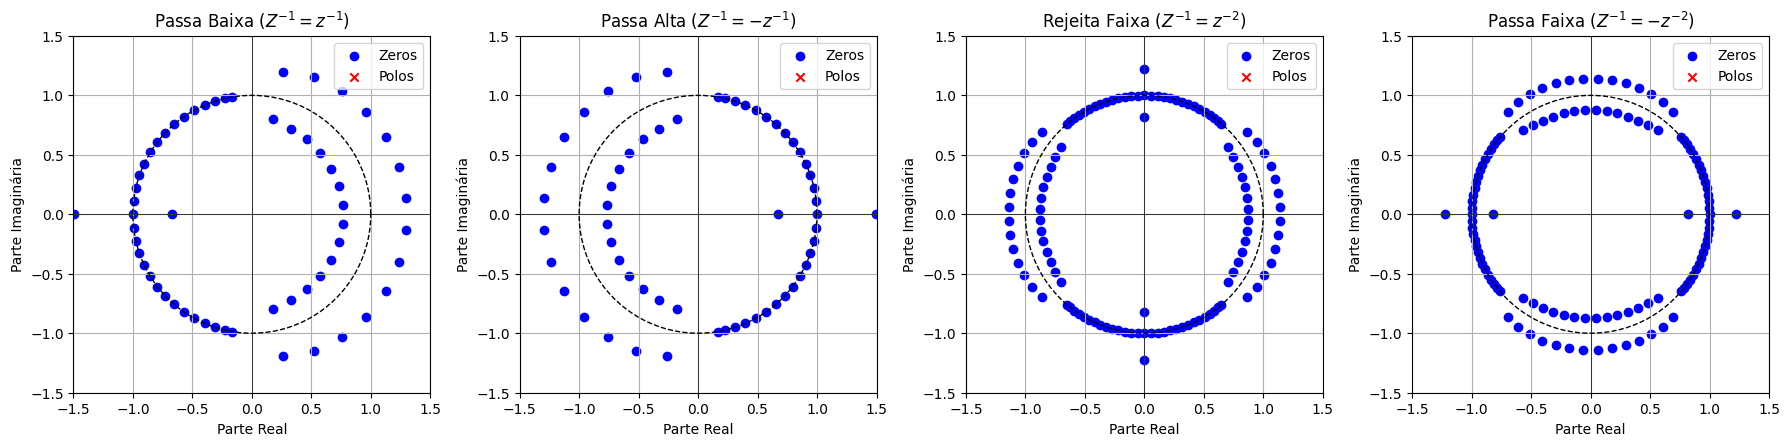

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Redefinir os par√¢metros do filtro FIR
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # œâc = œÄ/2
largura_transicao = 0.1 * np.pi  # Œîœâ < 0,1œÄ

# C√°lculo do par√¢metro Œ≤
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

# Criar o filtro FIR passa-baixa
h_fir = signal.firwin(M + 1, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# Fun√ß√£o para aplicar transforma√ß√µes no filtro
def transformar_filtro(h_fir, transformacao):
    if transformacao == 1:
        return h_fir * (-1) ** np.arange(len(h_fir))  # Passa Alta
    elif transformacao == 2:
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir  # Rejeita Faixa
        return novos_h_fir
    elif transformacao == 3:
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))  # Passa Faixa
        return novos_h_fir

# Aplicar as transforma√ß√µes no filtro
transformacoes = [
    (r'Passa Baixa ($Z^{-1} = z^{-1}$)', h_fir),
    (r'Passa Alta ($Z^{-1} = -z^{-1}$)', transformar_filtro(h_fir, 1)),
    (r'Rejeita Faixa ($Z^{-1} = z^{-2}$)', transformar_filtro(h_fir, 2)),
    (r'Passa Faixa ($Z^{-1} = -z^{-2}$)', transformar_filtro(h_fir, 3))
]

# Criar os subplots organizados lado a lado
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for ax, (nome, h_transf) in zip(axes, transformacoes):
    z, p, k = signal.tf2zpk(h_transf, [1])  # Converter para polos, zeros e ganho

    ax.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
    ax.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Polos')

    # Desenhar o c√≠rculo unit√°rio
    theta = np.linspace(0, 2 * np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

    # Configura√ß√£o do gr√°fico
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imagin√°ria')
    ax.set_title(nome)
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

# Ajustar layout para melhor visualiza√ß√£o
plt.tight_layout()
plt.show()
